In [25]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv("/Users/bilal/Desktop/python/train.csv")


In [7]:
data = np.array(data)
m, n = data.shape

# Shuffle the data to split between train, cv and test dataset
np.random.shuffle(data)

# Calculate the number of samples for each set
train_size = int(0.8 * m)
cv_size = int(0.1 * m)
test_size = m - train_size - cv_size

# Split the data
data_train = data[:train_size].T
data_cv = data[train_size:train_size + cv_size].T
data_test = data[train_size + cv_size:].T

# Separate features and labels, and normalize
Y_train = data_train[0]
X_train = data_train[1:n] / 255.

Y_cv = data_cv[0]
X_cv = data_cv[1:n] / 255.

Y_test = data_test[0]
X_test = data_test[1:n] / 255.

# Get the number of training examples
_, m_train = X_train.shape

print(f"Training set size: {train_size}")
print(f"Cross-validation set size: {cv_size}")
print(f"Test set size: {test_size}")

Training set size: 33600
Cross-validation set size: 4200
Test set size: 4200


In [13]:
Y_train

array([9, 9, 3, ..., 5, 1, 2])

In [17]:
import numpy as np

# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Softmax activation function
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivative of sigmoid function
def sigmoid_deriv(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# Get predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

# Get accuracy
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [101]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
0.12764880952380953
Iteration:  10
0.1275892857142857
Iteration:  20
0.1473809523809524
Iteration:  30
0.16529761904761905
Iteration:  40
0.19604166666666667
Iteration:  50
0.23285714285714285
Iteration:  60
0.2629166666666667
Iteration:  70
0.2875595238095238
Iteration:  80
0.30964285714285716
Iteration:  90
0.32916666666666666
Iteration:  100
0.3499404761904762
Iteration:  110
0.37241071428571426
Iteration:  120
0.3955952380952381
Iteration:  130
0.4187202380952381
Iteration:  140
0.4392559523809524
Iteration:  150
0.4587797619047619
Iteration:  160
0.47619047619047616
Iteration:  170
0.4922619047619048
Iteration:  180
0.5062797619047619
Iteration:  190
0.5216964285714286
Iteration:  200
0.5338095238095238
Iteration:  210
0.5458333333333333
Iteration:  220
0.5576190476190476
Iteration:  230
0.5679761904761905
Iteration:  240
0.5786011904761905
Iteration:  250
0.5875892857142857
Iteration:  260
0.596875
Iteration:  270
0.6050892857142857
Iteration:  280
0.613154761904761

In [103]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def test_prediction_cv(index, W1, b1, W2, b2):
    current_image = X_cv[:, index, None]
    prediction = make_predictions(X_cv[:, index, None], W1, b1, W2, b2)
    label = Y_cv[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


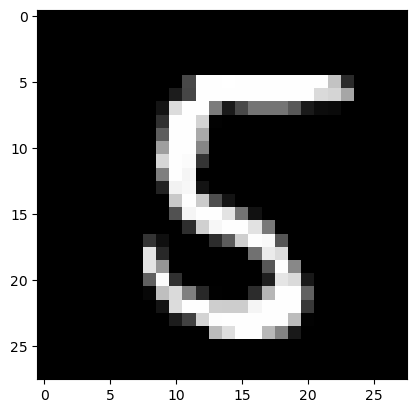

In [135]:

test_prediction(387, W1, b1, W2, b2)
